In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 주피터 노트북과 유사한 환경을 제공

# 환경설정

-  colab : 코드 작성,라이브터리 연동,GPU활용
-  구글 드라이브 : 데이터 가져오거나 저장


- 코랩에서 구글 드라이브에 있는 파일 접근
  - 왼쪽은 아이콘 클릭
    - 상단의 아이콘 클릭

(-0.5, 221.5, 299.5, -0.5)

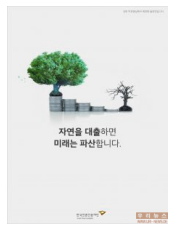

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/lecture_image/nature.png")
plt.imshow(img)
plt.axis("off")

In [ ]:
import pandas as pd

bmi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/bmi_500.csv")

bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# GPU 체크하기

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()





[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7056810727866794186
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14480004506340513283
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# 현재 할당된 GPU를 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus :
  try :
    # 메모리를 GPU 메모리를 사용
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re :
    print(re)

In [ ]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)


In [ ]:
!pip freeze

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.4
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.6.15
cffi==1.15.1
cftime==1.6.1
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.

# Keras 프레임워크

- Sequential() : 신경망(퍼셉트론으로 구성되어 있는 것, 뉴런으로 구성되어 있는 것)을 생성
- Dense() : 신경망에 퍼셉트론 층을 설정
  - units : 현재의 층의 퍼셉트론의 수 (출력의 수)
  - input_dim : 입력의 수(입력되는 데이터의 특성의 수)
- Activation() : 활성화 함수를 설정
- add() : Dense()나 Activation() 등을 신경망에 추가

<img src="https://drive.google.com/uc?id=1IxCo_7uxHWo3t6ctCY6RMPOWhYQQss9E">
<img src="https://drive.google.com/uc?id=1mn3FEBEj_OFl73EKs8geC1fOai4yXUpo">


- units : 1 (출력의 값 : 1 (1개))
- input_dim : 2 (입력 값 : x1, x2 (2개))

<img src="https://drive.google.com/uc?id=1aYt25z59utLNE7w4uqK00pWc9NiytBN0">

- 특성 수 : 3 (w1, w2, b)

# AND 논리 학습하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()

model1.add(Dense(units = 1, input_dim = 2))
model1.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [ ]:
import pandas as pd
import numpy as np

X_AND = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_AND = [0, 0, 0, 1]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [ ]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model1.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [ ]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size = 4, epochs = 8000) # 여러번 돌릴수록 loss가 낮아짐

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 10ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5502/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5503/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5504/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5505/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5506/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5507/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5508/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5509/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0813 - accuracy: 1.0000
Epoch 5510/8000
1/1 [==============================] - 0s 11ms/st

# 예측

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [0, 1, 0, 0]

pred = model1.predict(X_new)
pred

array([[5.8462348e-02],
       [9.4065017e-01],
       [2.2716529e-04],
       [5.4818332e-02]], dtype=float32)

# XOR논리 학습하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model2 = Sequential()

model2.add(Dense(units = 1, input_dim = 2))
model2.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 activation_4 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [ ]:
import pandas as pd
import numpy as np

X_XOR = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_XOR = [0, 1, 1, 0]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [ ]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model2.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [ ]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model2.fit(X_XOR, y_XOR, batch_size = 4, epochs = 4000) # 여러번 돌릴수록 loss가 낮아짐

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 15ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1502/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1503/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1504/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1505/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1506/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1507/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1508/4000
1/1 [==============================] - 0s 17ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1509/4000
1/1 [==============================] - 0s 37ms/step - loss: 0.6944 - accuracy: 0.5000
Epoch 1510/4000
1/1 [==============================] - 0s 16ms/

# 예측

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [1, 0, 0, 1]

pred = model2.predict(X_new)
pred

array([[0.50001836],
       [0.49996126],
       [0.5000583 ],
       [0.50000113]], dtype=float32)

# MLP 만들기


- 퍼셉트론 2개로 신경망 구성하기


In [ ]:
model3 = Sequential()

model3.add(Dense(units=1, input_dim=2))
model3.add(Activation("sigmoid"))
# 2번째 층부터는 input_dim을 설정하지 않아도 자동으로 인식
model3.add(Dense(units=1))
model3.add(Activation("sigmoid"))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
 activation_5 (Activation)   (None, 1)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
 activation_6 (Activation)   (None, 1)                 0         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### **퍼셉트론 5개로 신경망 만들기**

<img src="https://drive.google.com/uc?id=1UCQ8RZ_A_aW7HInoDr2TYgsrPYCrPxYh">

In [ ]:
model4 = Sequential()

model4.add(Dense(units=4, input_dim=2))
model4.add(Activation("sigmoid"))
model4.add(Dense(units=1, input_dim=4))
model4.add(Activation("sigmoid"))

model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 12        
                                                                 
 activation_7 (Activation)   (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
 activation_8 (Activation)   (None, 1)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


- **입력 * 출력 + 출력 = 특성 수**
  - 2 * 4 + 4 = 12
  - 4 * 1 + 1 = 5

- **각 Dense마다 특성 수 구해서 더하면 총 특성 개수 구할 수 있음**
  - 12 + 5 = 17

In [ ]:
model4.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [ ]:
model4.fit(X_XOR, y_XOR, batch_size=4, epochs=4000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1502/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1503/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1504/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1505/4000
1/1 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1506/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 1507/4000
1/1 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1508/4000
1/1 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1509/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0365 - accuracy: 1.0000
Epoch 1510/4000
1/1 [==============================] - 0s 10ms/

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [1, 0, 0, 1]

pred = model4.predict(X_new)
pred

array([[0.8820315 ],
       [0.06276838],
       [0.06403089],
       [0.9875    ]], dtype=float32)

## **targer과 출력, activation 관계**
<table>
  <tr>
    <th></th>
    <th>출력</th>
    <th>Activation</th>
  </tr>
  <tr>
    <td>회귀</td>
    <td>1</td>
    <td>Linear(생략)</td>
  </tr>
  <tr>
    <td>이진분류</td>
    <td>1</td>
    <td>sigmoid</td>
  </tr>
  <tr>
    <td>이진분류</td>
    <td>2 (one-hot 인코딩)</td>
    <td>softmax</td>
  </tr>
  <tr>
    <td>다진분류</td>
    <td>n (one-hot 인코딩)</td>
    <td>softmax</td>
  </tr>
</table>
- one-hot인코딩에는 softmax

<img src="https://drive.google.com/uc?id=1webioYzKzxkVIXSzSSjZvuBERFxJKPW_">
<img src="https://drive.google.com/uc?id=1zGGJJaeX_7r5-GdKGLsX17HA9jo5IUQb">

- 1층 퍼셉트론 수 : 3
- 2층 퍼셉트론 수 : 2
- 3층 퍼셉트론 수 : 1

# [실습] 6개 퍼셉트론이 3층으로 구성된 신경 설계

In [ ]:
model5 = Sequential()

# 입력층
model5.add(Dense(units=3, input_dim=2, activation="sigmoid"))

# 은닉층
model5.add(Dense(units=2, activation="sigmoid"))

# 출력층
model5.add(Dense(units=1, activation="sigmoid"))
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### **신경망 구조를 보고 Keras로 설계하기**

<img src="https://drive.google.com/uc?id=1xGEtTB242St_Xck7LOUdwzpT_gfbP7Vg">

In [ ]:
model6 = Sequential()

# 입력층
model6.add(Dense(units=4, input_dim=2, activation="sigmoid"))

# 은닉층
model6.add(Dense(units=3, activation="sigmoid"))
model6.add(Dense(units=2, activation="sigmoid"))
model6.add(Dense(units=3, activation="sigmoid"))

# 출력층
model6.add(Dense(units=1, activation="sigmoid"))

model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 2)                 8         
                                                                 
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 dense_16 (Dense)            (None, 1)                 4         
                                                                 
Total params: 48
Trainable params: 48
Non-trainable params: 0
_________________________________________________________________


# 신경망에 층을 쌓는 방법들

- **디코딩 방식 : 퍼셉트론을 점점 늘려가는 방식 (특성 추출)**

<img src="https://drive.google.com/uc?id=1iSgwRiSO3lraOtIfNwv2iw5dQO3mvESE">

- **인코딩 방식 : 퍼셉트론을 점점 줄여가는 방식 (특성 선택)**

<img src="https://drive.google.com/uc?id=1lasV_oqnrD9h1OlUkqZF7nTM1eHNMSln">

- **리니어 방식 : 퍼셉트론 수를 일정하게 배치하는 방식**

<img src="https://drive.google.com/uc?id=1TVLE-Wgp_JxH0aCxGdp7ap2vnJZEMWwR">

- **디코딩 -> 인코딩 : ex) GAN**

<img src="https://drive.google.com/uc?id=1iw8PtZic7wo3e6qd1aAx9CIeCy8ZVtW2">



- 인코딩 -> 디코딩
- 리니어 -> 디코딩
- 리니어 -> 인코딩
- 디코딩 -> 리니어
- 인코딩 -> 리니어

# 폐암환자 데이터셋을 이용하여 생존유무 예측하기

- 수치형 데이터 : 폐활량, 호기량, 나이
- 범주형 데이터 : 상태, 통증, 객혈, 호흡, 기침

In [ ]:
import pandas as pd

col_name = ["번호", "유형", "폐활량", "호기량", "상태", "통증", "객혈", 
            "호흡", "기침", "약화", "크기", "당뇨", "MI", "PAD", 
            "흡연", "천식", "나이", "생존"]
file_path = "/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/"
data = pd.read_csv(file_path + "ThoraricSurgery.csv", header=None, index_col=0, names=col_name)

data.head()

# 수치형 컬럼 : 폐활량, 호기량, 나이
# 유형 : 1, 2, 3, 4, 5, 6, 8
# 상태 : 0, 1, 2
# 크기 : 11, 12, 13, 14
# IM (심근경색), PAD (말초동맥경화)

,유형,폐활량,호기량,상태,통증,객혈,호흡,기침,약화,크기,당뇨,MI,PAD,흡연,천식,나이,생존
번호,,,,,,,,,,,,,,,,,
293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [ ]:
# 데이터의 구조 및 개수
data.shape

# 데이터 개수 : 470개
# 특성의 수 : 16개 (종양의 유형, 크기, 폐활량, 기침 여부, 흠연 여부 등)

(470, 17)

In [ ]:
# 라벨 데이터의 클래스의 수와 클래스별 데이터 갯수
print("라벨 데이터의 클래스 수 : ", data["생존"].unique())
print("라벨 데이터의 클래스별 데이터수 : ", data["생존"].value_counts())
print("유형컬럼 데이터의 클래스 : ", data["유형"].unique())
print("유형컬럼 데이터의 클래스 : ", data["상태"].unique())
print("유형컬럼 데이터의 클래스 : ", data["크기"].unique())

라벨 데이터의 클래스 수 :  [0 1]
라벨 데이터의 클래스별 데이터수 :  0    400
1     70
Name: 생존, dtype: int64
유형컬럼 데이터의 클래스 :  [1 2 3 4 5 6 8]
유형컬럼 데이터의 클래스 :  [0 1 2]
유형컬럼 데이터의 클래스 :  [12 14 11 13]


In [ ]:
# 특성 데이터와 라벨데이터로 분리
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

X.shape, y.shape

((470, 16), (470,))

In [ ]:
# 시드 설정
import tensorflow as tf
import numpy as np

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model7 = Sequential()

# 입력층
model7.add(Dense(units=32, input_dim=16, activation="sigmoid"))

# 은닉층
model7.add(Dense(units=64, activation="sigmoid"))
model7.add(Dense(units=128, activation="sigmoid"))
model7.add(Dense(units=64, activation="sigmoid"))
model7.add(Dense(units=32, activation="sigmoid"))
model7.add(Dense(units=16, activation="sigmoid"))
model7.add(Dense(units=8, activation="sigmoid"))
model7.add(Dense(units=4, activation="sigmoid"))

# 출력층
model7.add(Dense(units=1, activation="sigmoid"))

model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 8)                

In [ ]:
model7.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]
               )

In [ ]:
model7.fit(X, y, epochs=500, batch_size=10)

Epoch 1/500
47/47 [==============================] - 3s 3ms/step - loss: 0.6360 - accuracy: 0.8511
Epoch 2/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.8511
Epoch 3/500
47/47 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.8511
Epoch 4/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.8511
Epoch 5/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.8511
Epoch 6/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.8511
Epoch 7/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.8511
Epoch 8/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4386 - accuracy: 0.8511
Epoch 9/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.8511
Epoch 10/500
47/47 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.8511
Epoch 11/

# 모델 평가
- evaluate(특성, 라벨) : 오차와 정확도 반환

In [ ]:
# 모델 평가 : 오차, 정확도 반환
model7.evaluate(X,y)

15/15 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8511


[0.42086002230644226, 0.8510638475418091]

In [ ]:
# 예측
y_pred = model7.predict(X)

for i in range(1,10):
  print(y_pred[i])

[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]
[0.14934051]


# 라벨을 원핫인코딩한 데이터를 학습
- 출력층의 units를 라벨의 클래스 수와 동일하게 설정
- 출력층의 activation를 softmax로 설정

In [ ]:
import pandas as pd

# y를 원핫인코딩
y_en =pd.get_dummies(y)
y_en.shape

(470, 2)

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()

#입력층
model8.add(Dense(units=32, input_dim=16, activation="sigmoid"))

#은닉층
model8.add(Dense(units=64, activation="sigmoid"))
model8.add(Dense(units=32, activation="sigmoid"))
model8.add(Dense(units=16, activation="sigmoid"))

#출력층
# 라벨을 원핫인코딩 한 경우에는 units을 라벨의 클래스 수로 설정하고
# activation은 softmax로 설정
model8.add(Dense(units=2, activation="softmax"))
model8.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                544       
                                                                 
 dense_29 (Dense)            (None, 64)                2112      
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 2)                 34        
                                                                 
Total params: 5,298
Trainable params: 5,298
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"]
               )

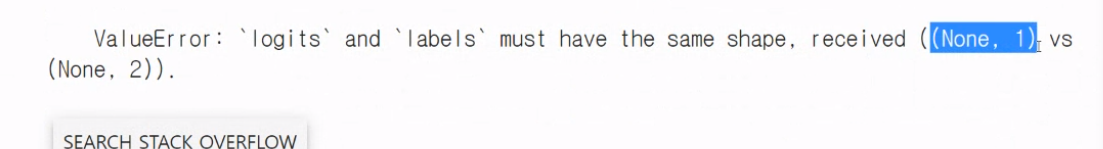

- 자주 발생하는 오류 : 출력값과 입력값이 달라서 발생한 오류

In [ ]:
# 예측
y_pred = model8.predict(X)

for i in range(1, 10) :
  print(y_pred[i])

[0.8368841  0.16311589]
[0.83688414 0.16311584]
[0.836884 0.163116]
[0.8368841  0.16311589]
[0.8368841  0.16311593]
[0.8368841  0.16311596]
[0.8368841  0.16311589]
[0.83688414 0.16311584]
[0.83688414 0.16311584]


# wine 데이터 셋을 활용한 회귀/ 분류 학습

In [ ]:
# 데이터 로드
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wine.shape

(6497, 13)

In [ ]:
print("wine quality :",wine["quality"].unique())
print("wine type :",wine['type'].unique())

wine quality : [5 6 7 4 8 3 9]
wine type : [1 0]


# 회귀분석

In [ ]:
# 내 방법
# print(wine.columns) 해서 복.붙하기
# X = wine.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#        'pH', 'sulphates', 'quality', 'type']]
# y = wine["alcohol"]
# 경준님 방법
X = wine.loc[:,].drop("alcohol", axis=1)
y = wine["alcohol"]

# 선생님 방법
# y = wine["alcohol"]
# del wine["alcohol"]
# X = wine

# X.shape, y.shape

In [ ]:
print(X.head())
print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   quality  type  
0        5     1  
1        5     1  
2        5     1  
3        6

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model9 = Sequential()

model9.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model9.add(Dense(units=48, activation="sigmoid"))
model9.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model9.add(Dense(units=1, activation="linear"))
model9.add(Dense(units=1))

model9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 24)                312       
                                                                 
 dense_50 (Dense)            (None, 48)                1200      
                                                                 
 dense_51 (Dense)            (None, 24)                1176      
                                                                 
 dense_52 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 회귀인 경우 loss는 mse, metrics는 설정하지 않음
model9.compile(loss="mse", optimizer="adam")

In [ ]:
h9 = model9.fit(X, y, batch_size=100, epochs=100)

Epoch 1/100
65/65 [==============================] - 1s 3ms/step - loss: 79.2909
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 44.4019
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 30.3309
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 22.2215
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 16.3340
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 11.9376
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 8.6759
Epoch 8/100
65/65 [==============================] - 0s 3ms/step - loss: 6.2615
Epoch 9/100
65/65 [==============================] - 0s 3ms/step - loss: 4.4095
Epoch 10/100
65/65 [==============================] - 0s 3ms/step - loss: 3.1698
Epoch 11/100
65/65 [==============================] - 0s 3ms/step - loss: 2.4125
Epoch 12/100
65/65 [==============================] - 0s 2ms/step - loss: 1.9652
Epoch 13/100
65/65 [===========

In [ ]:
model9.evaluate(X,y)

204/204 [==============================] - 0s 2ms/step - loss: 0.8109


0.8109251260757446

# 결과 시각화하기

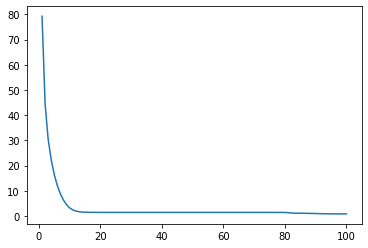

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss 값들을 가져온다.
loss9 = h9.history["loss"]

# 반복수
xaxis = range(1, len(loss9) + 1)

plt.plot(xaxis, loss9)

# 훈련 데이터와 테스트 데이터로 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 1), (1625, 1))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model10 = Sequential()

model10.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model10.add(Dense(units=48, activation="sigmoid"))
model10.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model10.add(Dense(units=1, activation="linear"))
model10.add(Dense(units=1))

model10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 24)                312       
                                                                 
 dense_54 (Dense)            (None, 48)                1200      
                                                                 
 dense_55 (Dense)            (None, 24)                1176      
                                                                 
 dense_56 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,713
Trainable params: 2,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model10.compile(loss="mse", optimizer="adam")

In [ ]:
h10 = model10.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
49/49 [==============================] - 1s 7ms/step - loss: 81.3978 - val_loss: 59.8041
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 47.3420 - val_loss: 37.5720
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 32.0266 - val_loss: 26.8162
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 23.4329 - val_loss: 20.0765
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 17.5653 - val_loss: 15.0281
Epoch 6/100
49/49 [==============================] - 0s 4ms/step - loss: 13.1185 - val_loss: 11.1825
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: 9.7320 - val_loss: 8.2533
Epoch 8/100
49/49 [==============================] - 0s 4ms/step - loss: 7.0657 - val_loss: 5.8697
Epoch 9/100
49/49 [==============================] - 0s 4ms/step - loss: 5.0018 - val_loss: 4.2061
Epoch 10/100
49/49 [==============================] - 0s 4ms/step - loss: 3.6338 - val_loss: 3.12

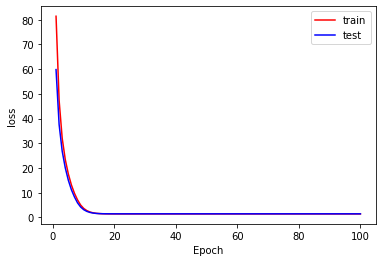

In [ ]:
import matplotlib.pyplot as plt

# 학습 결과에서 loss값들을 가져온다
loss10 = h10.history["loss"]
val_loss10 = h10.history["val_loss"]

# 반복수
xaxis = range(1, len(loss10) + 1)

plt.plot(xaxis, loss10, "r", label="train")
plt.plot(xaxis, val_loss10, "b", label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.show()

# 다진분류

In [ ]:
# 라벨 값을 quality 컬럼 사용
X = wine.loc[:,].drop("quality", axis=1)
y = wine["quality"]
print("wine quality :",y.unique())

# y를 원핫인코딩
y_en = pd.get_dummies(y)
y_en.shape

wine quality : [5 6 7 4 8 3 9]


(6497, 7)

In [ ]:
# 훈련 데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state = 0 )
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4872, 12), (4872, 7), (1625, 12), (1625, 7))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model11 = Sequential()

model11.add(Dense(units=24, input_dim=12, activation="sigmoid"))

model11.add(Dense(units=48, activation="sigmoid"))
model11.add(Dense(units=24, activation="sigmoid"))

# 회귀인 경우 units는 1로 activation은 linear을 쓰거나 activation을 설정하지 않음
# model10.add(Dense(units=1, activation="linear"))
model11.add(Dense(units=7, activation="softmax"))

model11.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 24)                312       
                                                                 
 dense_74 (Dense)            (None, 48)                1200      
                                                                 
 dense_75 (Dense)            (None, 24)                1176      
                                                                 
 dense_76 (Dense)            (None, 7)                 175       
                                                                 
Total params: 2,863
Trainable params: 2,863
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model11.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h11 = model11.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
49/49 [==============================] - 1s 7ms/step - loss: 1.7379 - accuracy: 0.3555 - val_loss: 1.4416 - val_accuracy: 0.4332
Epoch 2/100
49/49 [==============================] - 0s 4ms/step - loss: 1.3545 - accuracy: 0.4376 - val_loss: 1.3237 - val_accuracy: 0.4332
Epoch 3/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2957 - accuracy: 0.4376 - val_loss: 1.3008 - val_accuracy: 0.4332
Epoch 4/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2826 - accuracy: 0.4376 - val_loss: 1.2949 - val_accuracy: 0.4332
Epoch 5/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2778 - accuracy: 0.4376 - val_loss: 1.2925 - val_accuracy: 0.4332
Epoch 6/100
49/49 [==============================] - 0s 5ms/step - loss: 1.2747 - accuracy: 0.4376 - val_loss: 1.2909 - val_accuracy: 0.4332
Epoch 7/100
49/49 [==============================] - 0s 4ms/step - loss: 1.2730 - accuracy: 0.4376 - val_loss: 1.2915 - val_accuracy: 0.4332
Epoch 8/100
4

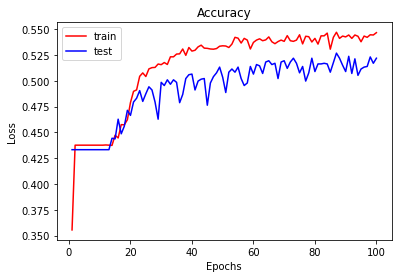

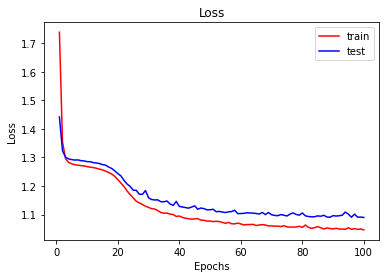

In [ ]:
import matplotlib.pyplot as plt

acc11 = h11.history["accuracy"]
val_acc11 = h11.history["val_accuracy"]
loss11 = h11.history["loss"]
val_loss11 = h11.history["val_loss"]

# 반복수
x_axis = range(1, len(loss11) + 1)

# 정확도
plt.plot(xaxis, acc11, "r", label="train")
plt.plot(xaxis, val_acc11, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Accuracy")
plt.show()

# 오차
plt.plot(xaxis, loss11, "r", label="train")
plt.plot(xaxis, val_loss11, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.show()

# [실습] 회귀분석 - 보스턴 집값 분석

- 13개의 특성과 1개의 클래스(가격)로 구성

  - CRIM : 인구 1인당 범죄 발생 수
  - ZN : 25,000평방 피트 이상의 주거 구역 비중
  - INDUS : 소매업 외 상업이 차지하는 면적 비율
  - CHAS : 찰스강 위치 변수 (1: 강 주변, 0: 이외)
  - NOX : 일산화질소 농도
  - RM : 집의 평균 방 수
  - AGE : 1940년 이전 지어진 비율
  - DIS : 5가지 보스턴 시 고용 시설까지의 거리
  - RAD : 순환고속도로의 접근 용이성
  - TAX : 10,000달러 당 부동산 세율 총계
  - PTRATIO : 지역별 학생과 교사 비율
  - B : 지역별 흑인 비율
  - LSTAT : 급여가 낮은 직업에 종사하는 인구 비율 (%)
  - 가격 (단위 : 1,000달러)

In [ ]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model12 = Sequential()

model12.add(Dense(units=30, input_dim=13, activation="sigmoid"))

model12.add(Dense(units=50, activation="sigmoid"))
model12.add(Dense(units=30, activation="sigmoid"))
model12.add(Dense(units=10, activation="sigmoid"))

model12.add(Dense(units=1))

model12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                420       
                                                                 
 dense_14 (Dense)            (None, 50)                1550      
                                                                 
 dense_15 (Dense)            (None, 30)                1530      
                                                                 
 dense_16 (Dense)            (None, 10)                310       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,821
Trainable params: 3,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model12.compile(loss="mse", optimizer="adam")

In [ ]:
h12 = model12.fit(X_train, y_train, batch_size=100, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 1s 37ms/step - loss: 563.9569 - val_loss: 587.2787
Epoch 2/1000
5/5 [==============================] - 0s 7ms/step - loss: 556.0603 - val_loss: 579.3640
Epoch 3/1000
5/5 [==============================] - 0s 8ms/step - loss: 548.4827 - val_loss: 571.7101
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 541.2049 - val_loss: 564.4822
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 534.3227 - val_loss: 557.5860
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 527.7164 - val_loss: 551.0488
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 521.4575 - val_loss: 544.7509
Epoch 8/1000
5/5 [==============================] - 0s 8ms/step - loss: 515.4655 - val_loss: 538.7527
Epoch 9/1000
5/5 [==============================] - 0s 8ms/step - loss: 509.6966 - val_loss: 533.1626
Epoch 10/1000
5/5 [==============================] - 0s 8ms/step - loss: 504.3559

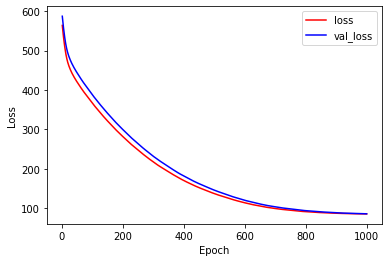

In [ ]:
loss12 = h12.history["loss"]
val_loss12 = h12.history["val_loss"]

xaxis=range(1, len(loss12)+1)

plt.plot(xaxis, loss12, "r", label="loss")
plt.plot(xaxis, val_loss12, "b", label="val_loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 선생님과 함께 숙제 풀이

In [ ]:
import tensorflow as tf
import numpy as np

seed = 0
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
import pandas as pd
train_data = pd.DataFrame(X_train)
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
1,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
2,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
3,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
4,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model011 = Sequential()

# 입력측(input_dim은 X_train의 칼럼 개수로 입력!!)
model011.add(Dense(units=32, input_dim=13, activation="sigmoid"))

# 은닉층(이왕이면 골고루 연결성을 유지하기 위해 2의 거듭제곱 수로 설정)
model011.add(Dense(units=64, activation="sigmoid"))
model011.add(Dense(units=16, activation="sigmoid"))


# 출력층(units는 y_train의 칼럼 개수로 입력!!)
model011.add(Dense(units=1))

model011.compile(loss="mse", optimizer="adam")  # 회귀에서 loss는 mse

In [ ]:
h011 = model011.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_test, y_test))
# batch_size는 많을수록 학습을 잘함(많이 외울수록 머리가 좋아지는 것과 유사)
# batch_size가 적으면 epochs를 많이 해주어야 함
# batch_size가 많으면 epochs를 적게 주어도 됨

Epoch 1/200
41/41 [==============================] - 1s 9ms/step - loss: 563.8020 - val_loss: 552.7781
Epoch 2/200
41/41 [==============================] - 0s 4ms/step - loss: 503.2679 - val_loss: 512.2854
Epoch 3/200
41/41 [==============================] - 0s 3ms/step - loss: 475.0963 - val_loss: 491.0121
Epoch 4/200
41/41 [==============================] - 0s 3ms/step - loss: 457.6962 - val_loss: 475.0295
Epoch 5/200
41/41 [==============================] - 0s 3ms/step - loss: 443.1954 - val_loss: 460.8206
Epoch 6/200
41/41 [==============================] - 0s 3ms/step - loss: 429.9575 - val_loss: 447.6732
Epoch 7/200
41/41 [==============================] - 0s 3ms/step - loss: 417.4932 - val_loss: 434.9388
Epoch 8/200
41/41 [==============================] - 0s 3ms/step - loss: 405.5246 - val_loss: 422.7744
Epoch 9/200
41/41 [==============================] - 0s 3ms/step - loss: 394.0174 - val_loss: 411.2623
Epoch 10/200
41/41 [==============================] - 0s 3ms/step - loss:

In [ ]:
# 예측하기
y_pred011 = model011.predict(X_test)

for i in range(10) :
  print(f"실제가격 : {y_test[i]}, 예측가격 :{y_pred011[i]}")

실제가격 : 7.2, 예측가격 :[12.986606]
실제가격 : 18.8, 예측가격 :[18.101828]
실제가격 : 19.0, 예측가격 :[20.74142]
실제가격 : 27.0, 예측가격 :[34.719124]
실제가격 : 22.2, 예측가격 :[21.831211]
실제가격 : 24.5, 예측가격 :[20.316948]
실제가격 : 31.2, 예측가격 :[32.62913]
실제가격 : 22.9, 예측가격 :[22.59414]
실제가격 : 20.5, 예측가격 :[20.302813]
실제가격 : 23.2, 예측가격 :[19.707224]


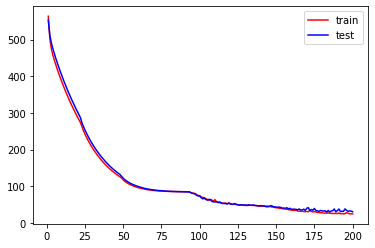

In [ ]:
# 시각화
import matplotlib.pyplot as plt

loss011 = h011.history["loss"]
val_loss011 = h011.history["val_loss"]

e = range(1, len(loss011) + 1)

plt.plot(e, loss011, "r", label="train")
plt.plot(e, val_loss011, "b", label="test")
plt.legend()

# [실습] 이진 분류

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=["target"])
# y.replace({0:'malignant', 1:'benign'}, inplace=True)
X.shape, y.shape

((569, 30), (569, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model13 = Sequential()

model13.add(Dense(units=40, input_dim=30, activation = "sigmoid"))

model13.add(Dense(units=60, activation = "sigmoid"))
model13.add(Dense(units=40, activation = "sigmoid"))
model13.add(Dense(units=20, activation = "sigmoid"))
model13.add(Dense(units=10, activation = "sigmoid"))

model13.add(Dense(units=1, activation = "sigmoid"))

In [ ]:
model13.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h13 = model13.fit(X_train, y_train, batch_size=100, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
5/5 [==============================] - 1s 47ms/step - loss: 0.8908 - accuracy: 0.3732 - val_loss: 0.8639 - val_accuracy: 0.3706
Epoch 2/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.8481 - accuracy: 0.3732 - val_loss: 0.8241 - val_accuracy: 0.3706
Epoch 3/1000
5/5 [==============================] - 0s 13ms/step - loss: 0.8093 - accuracy: 0.3732 - val_loss: 0.7890 - val_accuracy: 0.3706
Epoch 4/1000
5/5 [==============================] - 0s 14ms/step - loss: 0.7773 - accuracy: 0.3732 - val_loss: 0.7587 - val_accuracy: 0.3706
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.7490 - accuracy: 0.3732 - val_loss: 0.7336 - val_accuracy: 0.3706
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 0.7258 - accuracy: 0.3732 - val_loss: 0.7137 - val_accuracy: 0.3706
Epoch 7/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.7077 - accuracy: 0.3732 - val_loss: 0.6982 - val_accuracy: 0.3706
Epoch 8/1000
5/

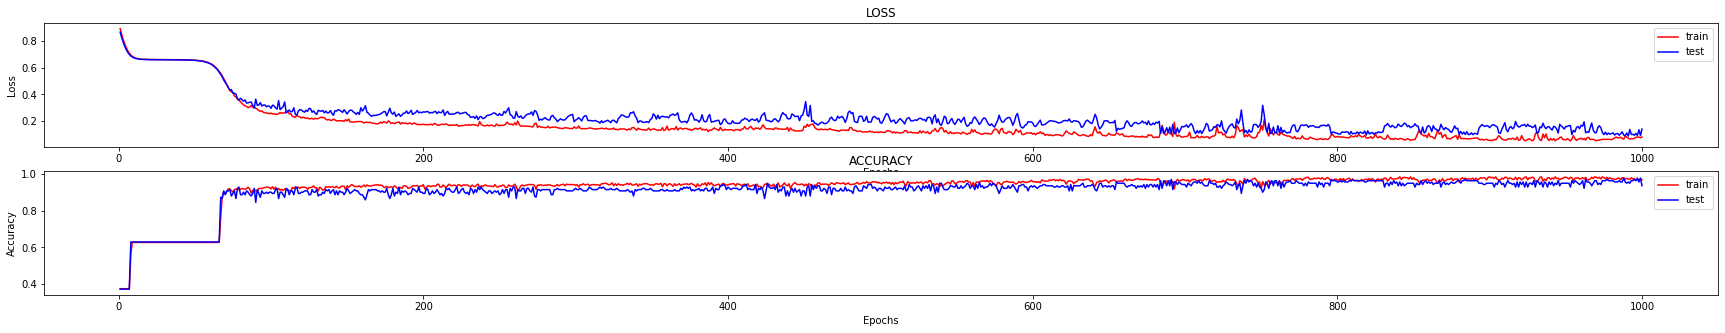

In [ ]:
import matplotlib.pyplot as plt

loss13 = h13.history["loss"]
val_loss13 = h13.history["val_loss"]

acc13 = h13.history["accuracy"]
val_acc13 = h13.history["val_accuracy"]

xaxis = range(1, len(loss13) + 1)


plt.figure(figsize=(30,10))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss13, "r", label="train")
plt.plot(xaxis, val_loss13, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc13, "r", label="train")
plt.plot(xaxis, val_acc13, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY")
plt.show()

## 선생님과 함께 숙제 풀이

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()

cancer.keys()

# data : 특성 데이터
# target : 라벨 데이터
# feature_names : 특성데이터의 칼럼명
# target_names : 라벨데이터의 클래스 종류(회귀 데이터에는 없음)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 훈련데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model012 = Sequential()

model012.add(Dense(units=32, input_dim=30, activation="sigmoid"))

model012.add(Dense(units=64, activation="sigmoid"))
model012.add(Dense(units=32, activation="sigmoid"))
model012.add(Dense(units=16, activation="sigmoid"))

# 이진분류(원핫인코딩을 하지 않으면 units=1, activation="sigmoid")
model012.add(Dense(units=1, activation="sigmoid"))

model012.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
h012 = model012.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/100
43/43 [==============================] - 1s 8ms/step - loss: 0.6722 - accuracy: 0.6080 - val_loss: 0.6563 - val_accuracy: 0.6294
Epoch 2/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6559 - accuracy: 0.6268 - val_loss: 0.6512 - val_accuracy: 0.6294
Epoch 3/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6515 - accuracy: 0.6268 - val_loss: 0.6436 - val_accuracy: 0.6294
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6392 - accuracy: 0.6268 - val_loss: 0.6272 - val_accuracy: 0.6294
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.6268 - val_loss: 0.5957 - val_accuracy: 0.6294
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.5645 - accuracy: 0.7183 - val_loss: 0.5242 - val_accuracy: 0.8741
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.8662 - val_loss: 0.4376 - val_accuracy: 0.8741
Epoch 8/100
4

In [ ]:
y_pred012 = model012.predict(X_test)

for i in range(10, 20) : 
  print(f"실제 target : {y_test[i]}, 예측  target : {y_pred012[i]}")

실제 target : 1, 예측  target : [0.94827235]
실제 target : 1, 예측  target : [0.94912225]
실제 target : 1, 예측  target : [0.9759104]
실제 target : 1, 예측  target : [0.72794217]
실제 target : 1, 예측  target : [0.92136955]
실제 target : 0, 예측  target : [0.02765971]
실제 target : 1, 예측  target : [0.96563894]
실제 target : 0, 예측  target : [0.02765959]
실제 target : 0, 예측  target : [0.319672]
실제 target : 0, 예측  target : [0.0276595]


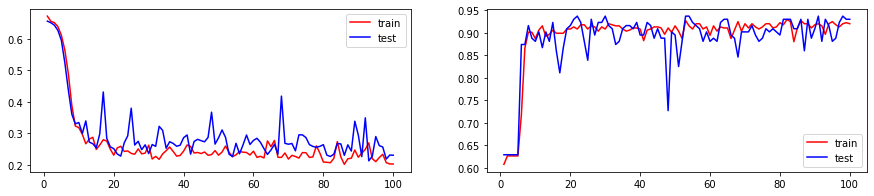

In [ ]:
# 시각화하기
import matplotlib.pyplot as plt

loss012 = h012.history["loss"]
val_loss012 = h012.history["val_loss"]

acc012 = h012.history["accuracy"]
val_acc012 = h012.history["val_accuracy"]

e = range(1, len(loss012) + 1)

plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
plt.plot(e, loss012, "r", label="train")
plt.plot(e, val_loss012, "b", label="test")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(e, acc012, "r", label="train")
plt.plot(e, val_acc012, "b", label="test")
plt.legend()
plt.show()

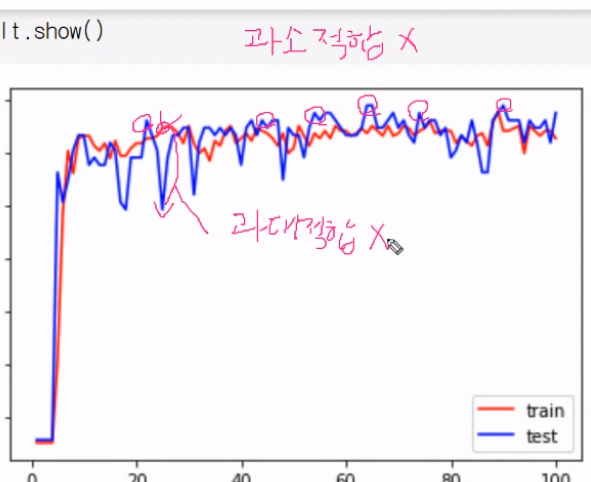

- 과소적합 >> epoch를 늘려줌(훈련이 더 필요함)
- 과대적합
- 과소와 과대 적밯을 왔다갔다한다는 것은 아직 학습이 더 필요하다는 의미
- 약간 상승 추세

# 피마인디언 당뇨병 데이터셋 분석

In [ ]:
# 피마인디언 당뇨병 데이터셋
  # 768명 데이터
  # 8개의 특성 데이터와 1개의 라벨데이터 (1 : 당뇨, 0 : 정상)
  # 특성 데이터 : pregnant(임신), plasma(공복혈당), pressure(혈압), thickness(삼두근 주름 두께), insulin(인슐린), BMI, pedigree(가족력), age(나이)
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/pima.csv", names=["pregnant", "plasma", "pressure", "thickness", "insulin",
                          "BMI", "pedigree", "age", "class"])
pima.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 결측치 확인
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima.describe()

# 결측치, 이상치 여부, 분산 정도, 편향정도
# 결측치 : count로 비교
# 이상치 : min과 25%, max와 75% 값이 다른 분위에 크게 변하는 값이 있는지 확인, max 값 확인
# 분산 : mean과 std 비교(mean보다 std가 큰 경우), std를 확인
# 편향 : mean과 50%를 비교 (비슷하면 정규분포 가능성이 높고 그렇지 않으면 편향이 있을 수 있음)

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


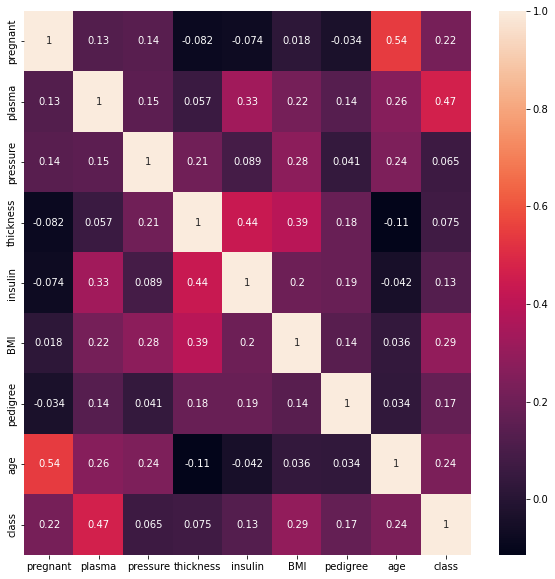

In [ ]:
# 상관관계 분석
import seaborn as sb

plt.figure(figsize=(10, 10))
sb.heatmap(pima.corr(), annot=True)

In [ ]:
# 특성 데이터와 라벨 데이터로 분리
X = pima.iloc[:, :-1]
y = pima.iloc[:, -1]

X.shape, y.shape

((768, 8), (768,))

In [ ]:
# 훈련데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model013 = Sequential()

# 입력층
model013.add(Dense(units=16, input_dim=8, activation="sigmoid"))

# 은닉층
model013.add(Dense(units=32, activation="sigmoid"))
model013.add(Dense(units=64, activation="sigmoid"))
model013.add(Dense(units=16, activation="sigmoid"))

# 출력층
model013.add(Dense(units=1, activation="sigmoid"))

# 모델 컴파일
model013.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

In [ ]:
h013 = model013.fit(X_train, y_train, epochs=500, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/500
29/29 [==============================] - 1s 8ms/step - loss: 0.6602 - accuracy: 0.6424 - val_loss: 0.6306 - val_accuracy: 0.6771
Epoch 2/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.6424 - val_loss: 0.6311 - val_accuracy: 0.6771
Epoch 3/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6424 - val_loss: 0.6296 - val_accuracy: 0.6771
Epoch 4/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6528 - accuracy: 0.6424 - val_loss: 0.6302 - val_accuracy: 0.6771
Epoch 5/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6424 - val_loss: 0.6317 - val_accuracy: 0.6771
Epoch 6/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.6424 - val_loss: 0.6283 - val_accuracy: 0.6771
Epoch 7/500
29/29 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6424 - val_loss: 0.6306 - val_accuracy: 0.6771
Epoch 8/500
2

In [ ]:
# 예측하기
y_pred013 = model013.predict(X_test)

for i in range(10) :
  print(f"실제값 : {y_test.iloc[i]}, 예측값 : {y_pred013[i]}")

실제값 : 1, 예측값 : [0.3191566]
실제값 : 0, 예측값 : [0.06397871]
실제값 : 0, 예측값 : [0.05141028]
실제값 : 1, 예측값 : [0.598233]
실제값 : 0, 예측값 : [0.7306101]
실제값 : 0, 예측값 : [0.05138529]
실제값 : 1, 예측값 : [0.5891248]
실제값 : 1, 예측값 : [0.59868276]
실제값 : 0, 예측값 : [0.83541363]
실제값 : 0, 예측값 : [0.85845155]


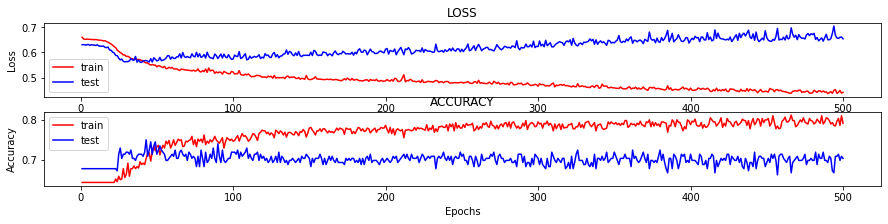

In [ ]:
# 시각화하기
import matplotlib.pyplot as plot

loss013 = h013.history["loss"]
val_loss013 = h013.history["val_loss"]

acc013 = h013.history["accuracy"]
val_acc013 = h013.history["val_accuracy"]

e = range(1, len(loss013) + 1)

plt.figure(figsize=(15, 3))
plt.subplot(2, 1, 1)
plt.plot(e, loss013, "r", label="train")
plt.plot(e, val_loss013, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(e, acc013, "r", label="train")
plt.plot(e, val_acc013, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()

### 원핫인코딩으로 해보기

In [ ]:
# 원핫 인코딩 (수치로 된 클래스만 원핫 인코딩이 가능)
from tensorflow.keras.utils import to_categorical

y_en = to_categorical(y)

y_en.shape

(768, 2)

In [ ]:
# 훈련데이터와 테스트데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576, 2), (192, 2))

In [ ]:
# 신경망 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model014 = Sequential()

# 입력층
model014.add(Dense(units=16, input_dim=8, activation="sigmoid"))

# 은닉층
model014.add(Dense(units=32, activation="sigmoid"))
model014.add(Dense(units=16, activation="sigmoid"))

# 출력층 : 원핫 인코딩한 이진분류
model014.add(Dense(units=2, activation="softmax"))

# 모델 컴파일
model014.compile(loss="binary_crossentropy",
                 optimizer="adam",
                 metrics=["accuracy"])

In [ ]:
# 훈련하기
h014 = model014.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/500
58/58 [==============================] - 1s 6ms/step - loss: 0.6694 - accuracy: 0.6424 - val_loss: 0.6351 - val_accuracy: 0.6771
Epoch 2/500
58/58 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6424 - val_loss: 0.6314 - val_accuracy: 0.6771
Epoch 3/500
58/58 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6424 - val_loss: 0.6297 - val_accuracy: 0.6771
Epoch 4/500
58/58 [==============================] - 0s 4ms/step - loss: 0.6513 - accuracy: 0.6424 - val_loss: 0.6289 - val_accuracy: 0.6771
Epoch 5/500
58/58 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.6424 - val_loss: 0.6288 - val_accuracy: 0.6771
Epoch 6/500
58/58 [==============================] - 0s 5ms/step - loss: 0.6490 - accuracy: 0.6424 - val_loss: 0.6245 - val_accuracy: 0.6771
Epoch 7/500
58/58 [==============================] - 0s 4ms/step - loss: 0.6469 - accuracy: 0.6424 - val_loss: 0.6253 - val_accuracy: 0.6771
Epoch 8/500
5

In [ ]:
# 예측하기
y_pred014 = model014.predict(X_test)

for i in range(10, 20) :
  print(f"실제값 : {y_test[i]}, 예측값 : {y_pred014[i]}")

실제값 : [0. 1.], 예측값 : [0.15760885 0.8423911 ]
실제값 : [0. 1.], 예측값 : [0.21031024 0.78968984]
실제값 : [1. 0.], 예측값 : [0.9893406  0.01065939]
실제값 : [1. 0.], 예측값 : [0.8621942  0.13780583]
실제값 : [1. 0.], 예측값 : [0.9744167  0.02558337]
실제값 : [1. 0.], 예측값 : [0.9278201  0.07217987]
실제값 : [0. 1.], 예측값 : [0.02285345 0.97714657]
실제값 : [1. 0.], 예측값 : [0.9980926  0.00190739]
실제값 : [1. 0.], 예측값 : [0.9284497  0.07155033]
실제값 : [1. 0.], 예측값 : [0.2718856  0.72811437]


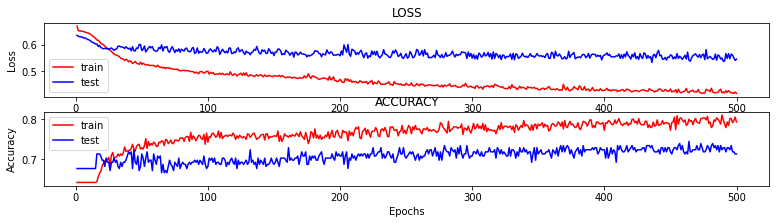

In [ ]:
# 시각화하기
import matplotlib.pyplot as plt

loss014 = h014.history["loss"]
val_loss014 = h014.history["val_loss"]

acc014 = h014.history["accuracy"]
val_acc014 = h014.history["val_accuracy"]

e = range(1, len(loss014) + 1)

plt.figure(figsize=(13, 3))
plt.subplot(2, 1, 1)
plt.plot(e, loss014, "r", label="train")
plt.plot(e, val_loss014, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(e, acc014, "r", label="train")
plt.plot(e, val_acc014, "b", label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()

# 다진 분류

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=["t"])

y.replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)

y_en = pd.get_dummies(y)
y_en.shape

(150, 3)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model14 = Sequential()

model14.add(Dense(units=20, input_dim=4, activation="sigmoid"))

model14.add(Dense(units=40, activation="sigmoid"))
model14.add(Dense(units=30, activation="sigmoid"))
model14.add(Dense(units=10, activation="sigmoid"))

model14.add(Dense(units=3, activation="softmax"))

model14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 20)                100       
                                                                 
 dense_12 (Dense)            (None, 40)                840       
                                                                 
 dense_13 (Dense)            (None, 30)                1230      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
 dense_15 (Dense)            (None, 3)                 33        
                                                                 
Total params: 2,513
Trainable params: 2,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model14.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h14 = model14.fit(X_train, y_train, batch_size=100, epochs=800, validation_data=(X_test, y_test))

Epoch 1/800
2/2 [==============================] - 1s 194ms/step - loss: 1.5418 - accuracy: 0.3304 - val_loss: 1.5020 - val_accuracy: 0.3421
Epoch 2/800
2/2 [==============================] - 0s 22ms/step - loss: 1.5103 - accuracy: 0.3304 - val_loss: 1.4724 - val_accuracy: 0.3421
Epoch 3/800
2/2 [==============================] - 0s 22ms/step - loss: 1.4813 - accuracy: 0.3304 - val_loss: 1.4447 - val_accuracy: 0.3421
Epoch 4/800
2/2 [==============================] - 0s 47ms/step - loss: 1.4522 - accuracy: 0.3304 - val_loss: 1.4187 - val_accuracy: 0.3421
Epoch 5/800
2/2 [==============================] - 0s 23ms/step - loss: 1.4262 - accuracy: 0.3304 - val_loss: 1.3944 - val_accuracy: 0.3421
Epoch 6/800
2/2 [==============================] - 0s 22ms/step - loss: 1.4012 - accuracy: 0.3304 - val_loss: 1.3713 - val_accuracy: 0.3421
Epoch 7/800
2/2 [==============================] - 0s 23ms/step - loss: 1.3774 - accuracy: 0.3304 - val_loss: 1.3493 - val_accuracy: 0.3421
Epoch 8/800
2/2 [==

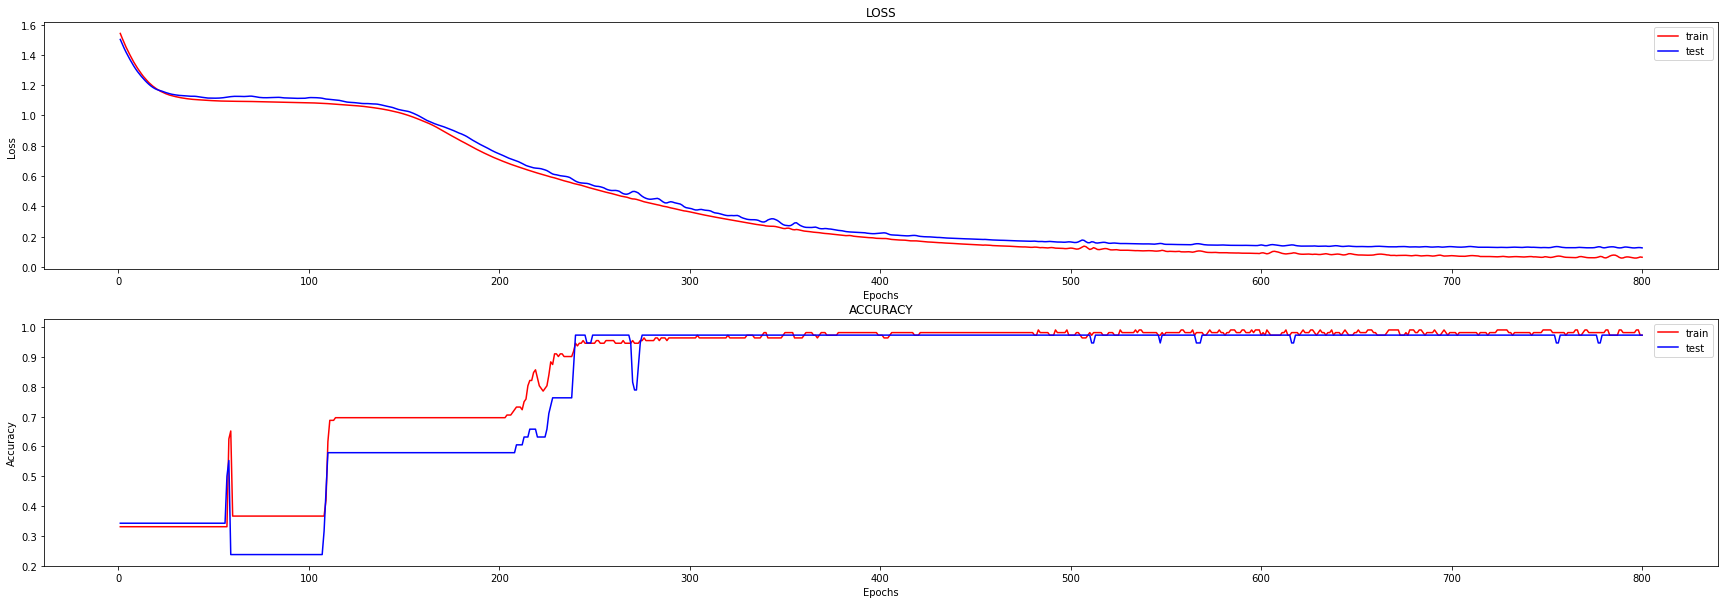

In [ ]:
#@title
import matplotlib.pyplot as plt

loss14 = h14.history["loss"]
val_loss14 = h14.history["val_loss"]

acc14 = h14.history["accuracy"]
val_acc14 = h14.history["val_accuracy"]

xaxis = range(1, len(loss14) + 1)

plt.figure(figsize=(30,10))
plt.subplot(2, 1, 1)
plt.plot(xaxis, loss14, "r", label="train")
plt.plot(xaxis, val_loss14, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(xaxis, acc14, "r", label="train")
plt.plot(xaxis, val_acc14, "b", label="test")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("ACCURACY")

plt.show()

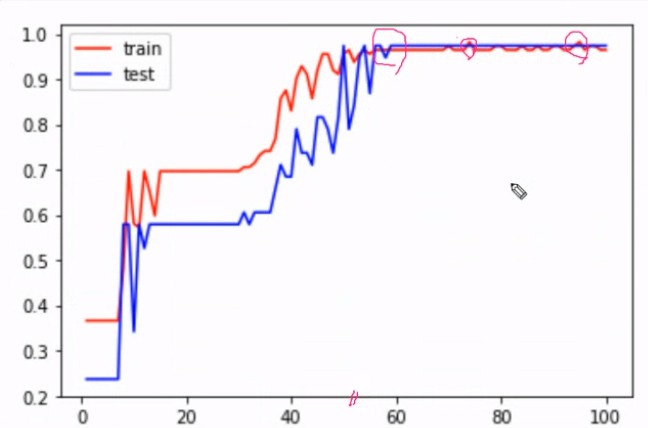

- 과소적합이 걸리는 이유 : 특성 수가 적어서 >> 동그라미 친 부분 모델로 예측

# 사물지능 과정생을 위한 Sensor 데이터셋 분석

In [ ]:
import pandas as pd

sonar = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_Learning/data/sonar.csv", names=range(1, 61))

X = sonar.iloc[:, :-1]
y = sonar.iloc[:, -1]

In [ ]:
# 원핫인코딩
y_en = pd.get_dummies(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_en, random_state=0) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((576, 8), (192, 8), (576, 2), (192, 2))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model15 = Sequential()

model15.add(Dense(units=16, input_dim=8, activation="sigmoid"))

model15.add(Dense(units=32, activation="sigmoid"))
model15.add(Dense(units=64, activation="sigmoid"))
model15.add(Dense(units=128, activation="sigmoid"))
model15.add(Dense(units=64, activation="sigmoid"))
model15.add(Dense(units=32, activation="sigmoid"))
model15.add(Dense(units=16, activation="sigmoid"))

model15.add(Dense(units=2, activation="softmax"))

model15.compile(loss="categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [ ]:
h15 = model15.fit(X_train, y_train, epochs=1000, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/1000
72/72 [==============================] - 1s 6ms/step - loss: 0.7091 - accuracy: 0.5451 - val_loss: 0.6296 - val_accuracy: 0.6771
Epoch 2/1000
72/72 [==============================] - 0s 6ms/step - loss: 0.6543 - accuracy: 0.6424 - val_loss: 0.6300 - val_accuracy: 0.6771
Epoch 3/1000
72/72 [==============================] - 1s 7ms/step - loss: 0.6543 - accuracy: 0.6424 - val_loss: 0.6313 - val_accuracy: 0.6771
Epoch 4/1000
72/72 [==============================] - 0s 5ms/step - loss: 0.6540 - accuracy: 0.6424 - val_loss: 0.6297 - val_accuracy: 0.6771
Epoch 5/1000
72/72 [==============================] - 1s 9ms/step - loss: 0.6544 - accuracy: 0.6424 - val_loss: 0.6330 - val_accuracy: 0.6771
Epoch 6/1000
72/72 [==============================] - 1s 9ms/step - loss: 0.6542 - accuracy: 0.6424 - val_loss: 0.6298 - val_accuracy: 0.6771
Epoch 7/1000
72/72 [==============================] - 1s 8ms/step - loss: 0.6530 - accuracy: 0.6424 - val_loss: 0.6359 - val_accuracy: 0.6771
Epoch 

In [ ]:
y_pred15 = model15.predict(X_test)

for i in range(10) :
  print(f"실제값 : {y_test.iloc[i:i+1, :]}, 예측값 : {y_pred15[i]}")

실제값 :      0  1
661  0  1, 예측값 : [0.63006645 0.36993358]
실제값 :      0  1
122  1  0, 예측값 : [0.8197154  0.18028463]
실제값 :      0  1
113  1  0, 예측값 : [0.9614675  0.03853245]
실제값 :     0  1
14  0  1, 예측값 : [0.18462816 0.8153718 ]
실제값 :      0  1
529  1  0, 예측값 : [0.482515   0.51748496]
실제값 :      0  1
103  1  0, 예측값 : [0.9610583  0.03894173]
실제값 :      0  1
338  0  1, 예측값 : [0.18244424 0.8175558 ]
실제값 :      0  1
588  0  1, 예측값 : [0.63007545 0.3699245 ]
실제값 :      0  1
395  1  0, 예측값 : [0.35727766 0.64272237]
실제값 :      0  1
204  1  0, 예측값 : [0.444189   0.55581105]


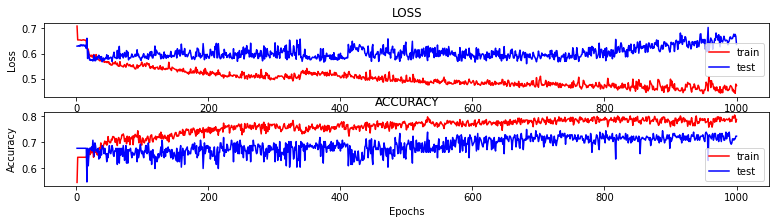

In [ ]:
import matplotlib.pyplot as pandas

loss15 = h15.history["loss"]
val_loss15 = h15.history["val_loss"]

acc15 = h15.history["accuracy"]
val_acc15 = h15.history["val_accuracy"]

e = range(1, len(loss15) + 1)

plt.figure(figsize=(13, 3))
plt.subplot(2, 1, 1)
plt.plot(e, loss15, "r", label="train")
plt.plot(e, val_loss15, 'b', label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS")

plt.subplot(2, 1, 2)
plt.plot(e, acc15, "r", label="train")
plt.plot(e, val_acc15, 'b', label="test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("ACCURACY")
plt.show()